# Section 2.2 — Multiple random variable

This notebook contains all the code examples from [Section 2.2 Multiple random variables]() in the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

### Coin tosses for n=100, n=1000, and n=10000

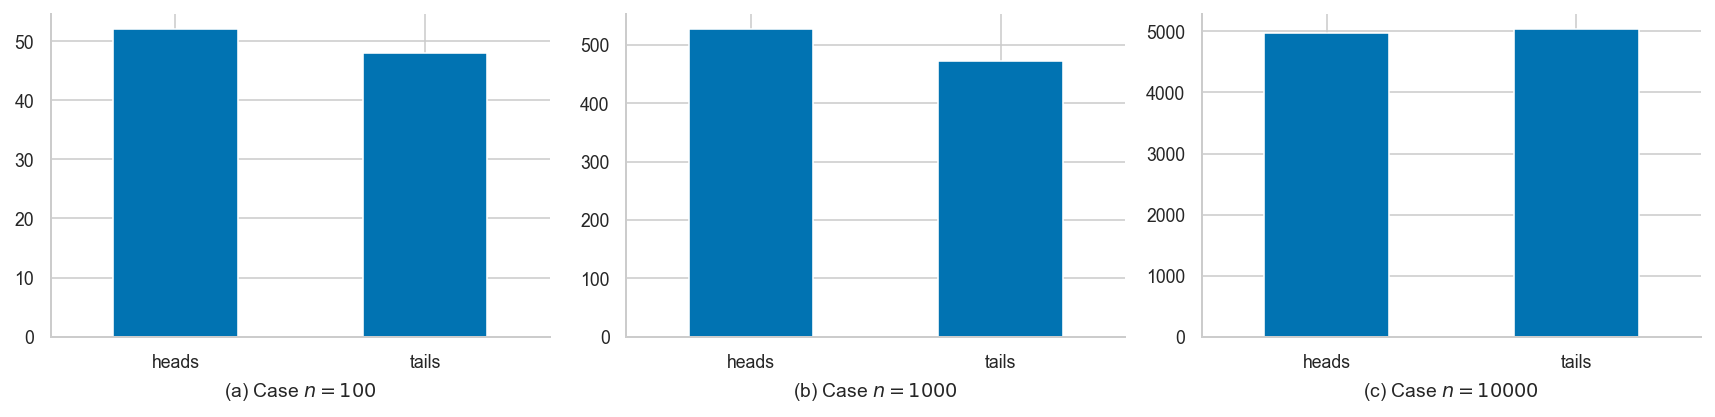

In [146]:
import numpy as np
np.random.seed(15)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import randint

rvC = randint(0, 2)


filename = "figures/panel_n_coin_flips.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 100
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 1000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 10000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Dice rolls 600 6000 60000

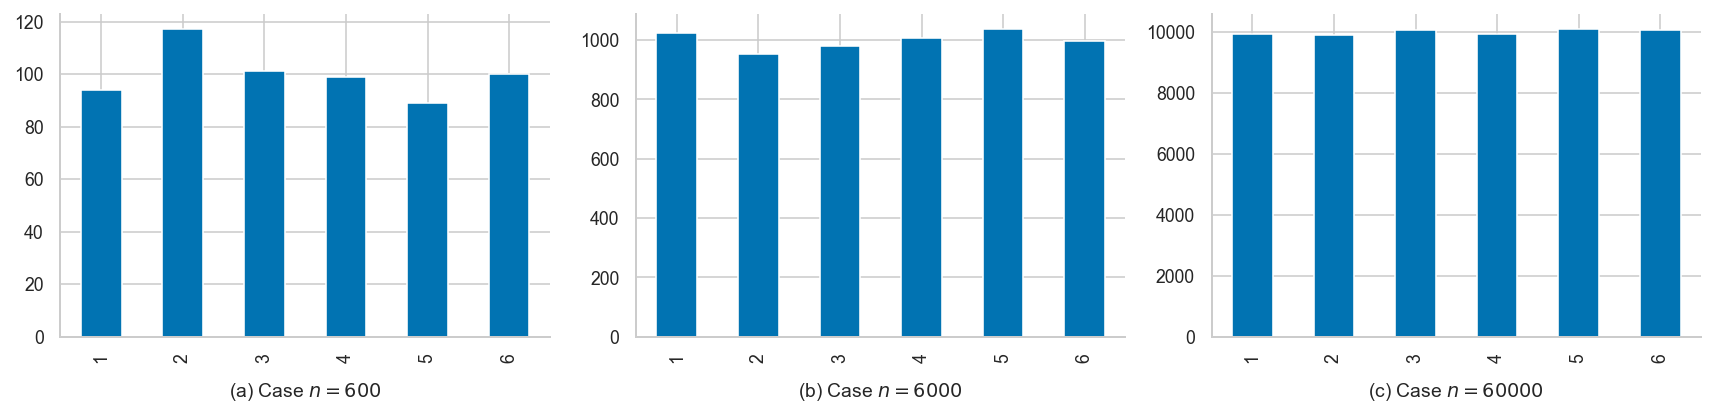

In [147]:
import numpy as np
np.random.seed(5)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import randint

rvD = randint(1, 7)


filename = "figures/panel_n_dice_rolls.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 600
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 6000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 60000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)
